In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("C:/Users/stanl/Downloads/world_economic_indicators.csv")
df.head()

,Country Name,Country Code,Year,"Personal remittances, received (% of GDP)","Unemployment, total (% of total labor force)",GDP (current US$)_x,GDP growth (annual %)_x,GDP (current US$)_y,GDP growth (annual %)_y
0,Aruba,ABW,1960,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,NaN,NaN,2.112502e+10,NaN,2.112502e+10,NaN
2,Afghanistan,AFG,1960,NaN,NaN,5.377778e+08,NaN,5.377778e+08,NaN
3,Africa Western and Central,AFW,1960,NaN,NaN,1.044764e+10,NaN,1.044764e+10,NaN
4,Angola,AGO,1960,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country Name                                  16758 non-null  object 
 1   Country Code                                  16758 non-null  object 
 2   Year                                          16758 non-null  int64  
 3   Personal remittances, received (% of GDP)     8817 non-null   float64
 4   Unemployment, total (% of total labor force)  7512 non-null   float64
 5   GDP (current US$)_x                           13365 non-null  float64
 6   GDP growth (annual %)_x                       12731 non-null  float64
 7   GDP (current US$)_y                           13365 non-null  float64
 8   GDP growth (annual %)_y                       12731 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.2+ MB


In [4]:
df.shape

(16758, 9)

In [5]:
df.describe()

,Year,"Personal remittances, received (% of GDP)","Unemployment, total (% of total labor force)",GDP (current US$)_x,GDP growth (annual %)_x,GDP (current US$)_y,GDP growth (annual %)_y
count,16758.000000,8817.000000,7512.000000,1.336500e+04,12731.000000,1.336500e+04,12731.000000
mean,1991.000000,3.687891,7.880116,1.206986e+12,3.681001,1.206986e+12,3.681001
std,18.184785,9.373359,5.524284,5.412748e+12,5.841943,5.412748e+12,5.841943
min,1960.000000,0.000000,0.095000,8.824746e+06,-64.047107,8.824746e+06,-64.047107
25%,1975.000000,0.335264,4.110000,2.523472e+09,1.461297,2.523472e+09,1.461297
50%,1991.000000,1.282325,6.386298,1.842778e+10,3.818608,1.842778e+10,3.818608
75%,2007.000000,3.787074,10.314750,2.243840e+11,6.080175,2.243840e+11,6.080175
max,2022.000000,235.927991,38.800000,1.005620e+14,149.972963,1.005620e+14,149.972963


In [6]:
nan_locations = df.isna().any()
nan_locations

Country Name                                    False
Country Code                                    False
Year                                            False
Personal remittances, received (% of GDP)        True
Unemployment, total (% of total labor force)     True
GDP (current US$)_x                              True
GDP growth (annual %)_x                          True
GDP (current US$)_y                              True
GDP growth (annual %)_y                          True
dtype: bool

In [7]:
df = df.dropna()
df.head()

,Country Name,Country Code,Year,"Personal remittances, received (% of GDP)","Unemployment, total (% of total labor force)",GDP (current US$)_x,GDP growth (annual %)_x,GDP (current US$)_y,GDP growth (annual %)_y
8247,Africa Eastern and Southern,AFE,1991,0.713281,7.333336,2.768570e+11,0.136909,2.768570e+11,0.136909
8249,Africa Western and Central,AFW,1991,0.649091,4.224595,1.180400e+11,1.110253,1.180400e+11,1.110253
8255,Argentina,ARG,1991,0.010078,5.440000,1.897200e+11,9.133111,1.897200e+11,9.133111
8259,Australia,AUS,1991,0.762288,9.580000,3.259820e+11,-0.383072,3.259820e+11,-0.383072
8260,Austria,AUT,1991,0.444421,3.420000,1.737940e+11,3.441628,1.737940e+11,3.441628


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 8247 to 16757
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country Name                                  6324 non-null   object 
 1   Country Code                                  6324 non-null   object 
 2   Year                                          6324 non-null   int64  
 3   Personal remittances, received (% of GDP)     6324 non-null   float64
 4   Unemployment, total (% of total labor force)  6324 non-null   float64
 5   GDP (current US$)_x                           6324 non-null   float64
 6   GDP growth (annual %)_x                       6324 non-null   float64
 7   GDP (current US$)_y                           6324 non-null   float64
 8   GDP growth (annual %)_y                       6324 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 494.1+ KB


In [10]:
df.drop(columns=['Country Name', 'Country Code', 'Year'], inplace=True, axis=1)
df.sample(5)

,"Personal remittances, received (% of GDP)","Unemployment, total (% of total labor force)",GDP (current US$)_x,GDP growth (annual %)_x,GDP (current US$)_y,GDP growth (annual %)_y
12787,1.055312,3.406,9.451435e+09,5.799992,9.451435e+09,5.799992
13372,1.457029,2.336,2.993379e+10,12.550538,2.993379e+10,12.550538
10411,0.410073,3.050,2.978830e+11,1.662701,2.978830e+11,1.662701
12399,4.545676,7.127,3.414056e+09,8.556235,3.414056e+09,8.556235
10655,1.083561,11.780,5.272617e+09,11.099999,5.272617e+09,11.099999


In [11]:
df.corr()

,"Personal remittances, received (% of GDP)","Unemployment, total (% of total labor force)",GDP (current US$)_x,GDP growth (annual %)_x,GDP (current US$)_y,GDP growth (annual %)_y
"Personal remittances, received (% of GDP)",1.000000,0.132388,-0.120021,0.013609,-0.120021,0.013609
"Unemployment, total (% of total labor force)",0.132388,1.000000,-0.073587,-0.097006,-0.073587,-0.097006
GDP (current US$)_x,-0.120021,-0.073587,1.000000,-0.027303,1.000000,-0.027303
GDP growth (annual %)_x,0.013609,-0.097006,-0.027303,1.000000,-0.027303,1.000000
GDP (current US$)_y,-0.120021,-0.073587,1.000000,-0.027303,1.000000,-0.027303
GDP growth (annual %)_y,0.013609,-0.097006,-0.027303,1.000000,-0.027303,1.000000


In [12]:
X = df[["GDP (current US$)_y"]]
y = df["GDP growth (annual %)_y"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
poly = PolynomialFeatures(degree=3)  # Change degree as necessary
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [15]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test_poly)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print(f'Mean Squared Error : {mse}')
print(f'R-Squared : {r2_score}')

Mean Squared Error : 23.254218117367092
R-Squared : <function r2_score at 0x000002E149539300>


C:\Users\stanl\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


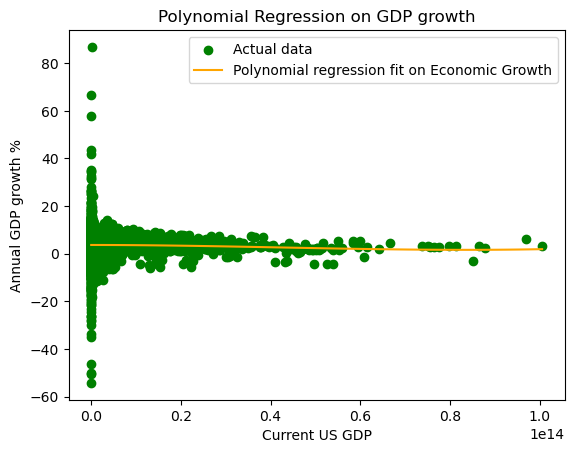

In [25]:
# Plotting the results
plt.scatter(X, y, color='green', label='Actual data')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = model.predict(poly.transform(X_range))
plt.plot(X_range, y_range_pred, color='orange', label='Polynomial regression fit on Economic Growth')
plt.xlabel("Current US GDP")
plt.ylabel("Annual GDP growth %")
plt.title('Polynomial Regression on GDP growth')
plt.legend()
plt.show();
